### Import libraries

In [11]:
import numpy as np
import cv2
import os

**Parameter**

In [12]:
folder_path = "trafficSignData"
label_file = 'labels.csv'
imageDimesions = (32, 32)
imageDimesiontest = (32, 32, 3)
ratio = 0.2

### Load the images and number of classes

In [13]:
images = []
classNumber = []

In [14]:
# get the path of the traffic data
myList = os.listdir(folder_path)
print("View each classes in traffic folder :", myList, "\n")

# get the number of classes (number of folder)
lengthOfClasses = len(myList)
print("Total length of classes :", lengthOfClasses, "\n")


View each classes in traffic folder : ['32', '35', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25'] 

Total length of classes : 43 



### Iterate to load the images and classes

In [15]:
print("Iterating to load images & classes\n")
# iterate 0 to length of classes (58)
for x in range(0, lengthOfClasses): # x is folder
    imagesList = os.listdir(os.path.join(folder_path, str(x))) # each (x) folder in trafficSignData 
    for img in imagesList:
        currentImage = cv2.imread(folder_path + "/" + str(x) + "/" + img) # trafficSignData --> x folder --> img = images
        if currentImage is not None:  # Check image is read
            currentImage = cv2.resize(currentImage, imageDimesions) # Resize to the dimensions to 32 X 32 pixels
            images.append(currentImage)
            classNumber.append(x)
        else:
            print(f"It is wrong folder path {folder_path}")
    print(x, end=" ")

Iterating to load images & classes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

### Convert list to numpy array

In [16]:
# Convert list to numpy array
images = np.array(images)
classNumber = np.array(classNumber)

**Result**

In [17]:
print(images)
print(classNumber)

[[[[133 115 110]
   [136 120 113]
   [155 135 126]
   ...
   [169 123  91]
   [166 130 103]
   [152 130 115]]

  [[127 114 108]
   [145 123 117]
   [164 139 131]
   ...
   [169 120  85]
   [167 121  84]
   [166 133 113]]

  [[122 114 106]
   [146 126 117]
   [166 142 131]
   ...
   [163 122  92]
   [160 121  93]
   [158 131 119]]

  ...

  [[ 86  87  86]
   [ 84  85  84]
   [ 86  87  85]
   ...
   [ 82  83  80]
   [ 82  83  81]
   [ 82  83  82]]

  [[ 85  87  86]
   [ 85  86  85]
   [ 85  86  84]
   ...
   [ 81  81  78]
   [ 80  81  79]
   [ 79  80  80]]

  [[ 83  86  85]
   [ 84  86  85]
   [ 83  85  84]
   ...
   [ 79  80  77]
   [ 78  79  78]
   [ 77  78  78]]]


 [[[153  40  32]
   [154  39  32]
   [155  41  35]
   ...
   [164  95  86]
   [155  99  94]
   [145 102  95]]

  [[150  48  42]
   [150  49  45]
   [151  49  42]
   ...
   [141 137 129]
   [120 121 122]
   [ 99 100 100]]

  [[136  89  87]
   [135  91  88]
   [135  90  83]
   ...
   [100 103  95]
   [110 109 120]
   [ 80  81

**Check images shape and classNumber**

- the first number is number of images
- 32 x 32 images
- 3 mean RGB 3 channals

In [18]:
print(images.shape)
print(classNumber.shape)

(34799, 32, 32, 3)
(34799,)


### Data Spliting

**import train_test_split**

In [19]:
from sklearn.model_selection import train_test_split

### Spliting the data
- split the array images, classNumber, set the test size for exmaple 0.2
- test_size = 0.2 means that training will be 0.8 percent and test will be 0.2, so 20% testing and 80% training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=ratio)

**Check whether it is split or not (train, test)**
- by using shape function

In [21]:
print("After spliting for images for traning")
print(X_train.shape)
print("After spliting for images for testing")
print(X_test.shape)

print("\n After spliting for classNUmber for traning & testing")
print(y_train.shape)
print(y_test.shape)

After spliting for images for traning
(27839, 32, 32, 3)
After spliting for images for testing
(6960, 32, 32, 3)

 After spliting for classNUmber for traning & testing
(27839,)
(6960,)


**Get the X_validation**
- to get X_validation use the 80% of images array which is X_train and use y_train

In [22]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=ratio)
print('Get the X_validation')
print(X_validation.shape)

Get the X_validation
(5568, 32, 32, 3)


**Print X_train, X_test, and X_validation**

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

# print(X_train)
# print(y_train)

(22271, 32, 32, 3) (22271,)
(6960, 32, 32, 3) (6960,)
(5568, 32, 32, 3) (5568,)


### Check the images and classes are match & dimension are correct

In [24]:
try:
    # check it is same or not
    assert X_train.shape[0] == y_train.shape[0], "Number of images and class should be match for training"
    assert X_test.shape[0] == y_test.shape[0], "Number of images and class should be match for testing"
    # check dimensions is same or not
    assert X_train.shape[1:] == imageDimesiontest, "Dimensions should be same one for training"
    assert X_test.shape[1:] == imageDimesiontest, "Dimensions should be same one for testing"
    print("All tests passed")
except AssertionError as e:
    print(e)


All tests passed


**What inside the X and Y**
- X_train contain = actual images, Y_train contain = the ids of each image

In [25]:
# show the all the index numbers which are class number 0
print("Index which related to class 0")
print(np.where(y_train==0))
# total length of classNumber 0
print("Length of the class 0")
print(len(np.where(y_train==0)[0]))

# Declare array to store length of each class
numberOfSamples = []

print("Total number of images for each Class")
for x in range(0,lengthOfClasses):
    print(f"Class {x}: {len(np.where(y_train == x)[0])}")
    # save each class in array
    numberOfSamples.append(len(np.where(y_train == x)[0]))

print(f"Array of classes's length : {numberOfSamples}")

Index which related to class 0
(array([   18,   501,   596,   650,   983,  1369,  1371,  1634,  1679,
        1783,  1807,  1918,  2297,  2347,  2433,  2833,  2905,  3024,
        3051,  3370,  3634,  3638,  3739,  3897,  4216,  4397,  4462,
        5021,  5303,  5403,  5604,  5629,  5796,  6005,  6055,  6088,
        6190,  6218,  6432,  6446,  6711,  6792,  6876,  7860,  8452,
        8681,  8881,  9034,  9075,  9277,  9318,  9380,  9537,  9569,
        9907, 10105, 10216, 10609, 10907, 10958, 11262, 11800, 12524,
       12536, 12611, 12715, 12862, 12958, 12966, 13166, 13700, 13922,
       14054, 14236, 14246, 14326, 14347, 14406, 14424, 14812, 14991,
       15098, 15311, 15350, 15720, 15892, 15956, 16690, 16823, 17410,
       17448, 17827, 17846, 17963, 17982, 18222, 18492, 18514, 18525,
       18996, 19336, 19405, 19659, 19831, 19869, 20368, 20565, 20620,
       20652, 20778, 20810, 20866, 20883, 21030, 21054, 21584, 21600,
       22010, 22237]),)
Length of the class 0
119
Total nu

### Virtualize the classes by number of length
- to make the chart, we need to import the matplotlib

**Import library**

In [26]:
import matplotlib.pyplot as plt

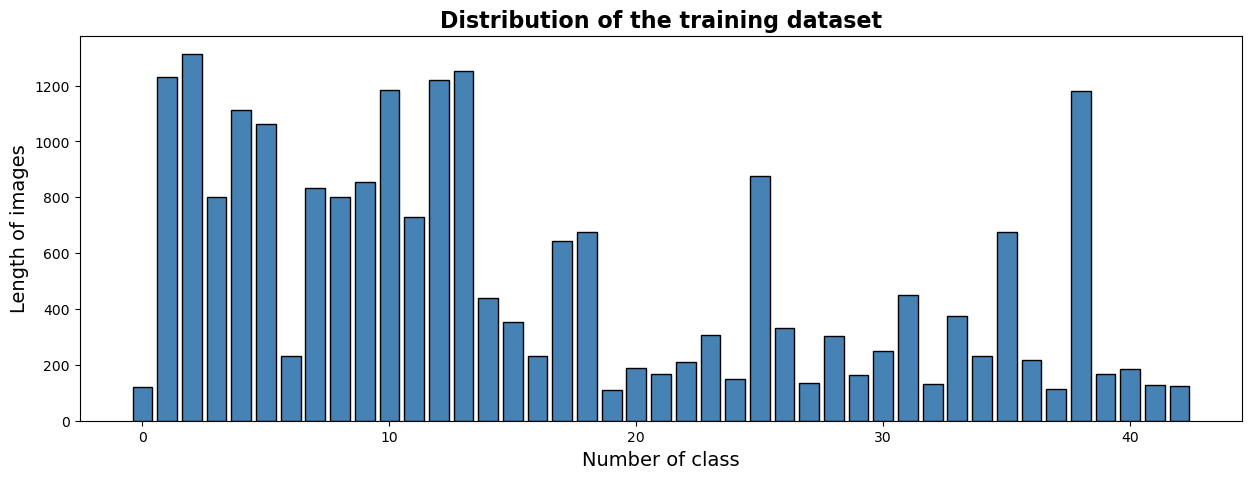

In [27]:
# 15 mean to length of figure & 5 mean to height of figure
plt.figure(figsize=(15, 5))

# start 0 to lengthofClasses, 
plt.bar(range(0, lengthOfClasses), numberOfSamples, color="steelblue", edgecolor='black')
plt.title("Distribution of the training dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of class", fontsize=14)
plt.ylabel("Length of images", fontsize=14)
plt.show()

### Virtualize with line chart

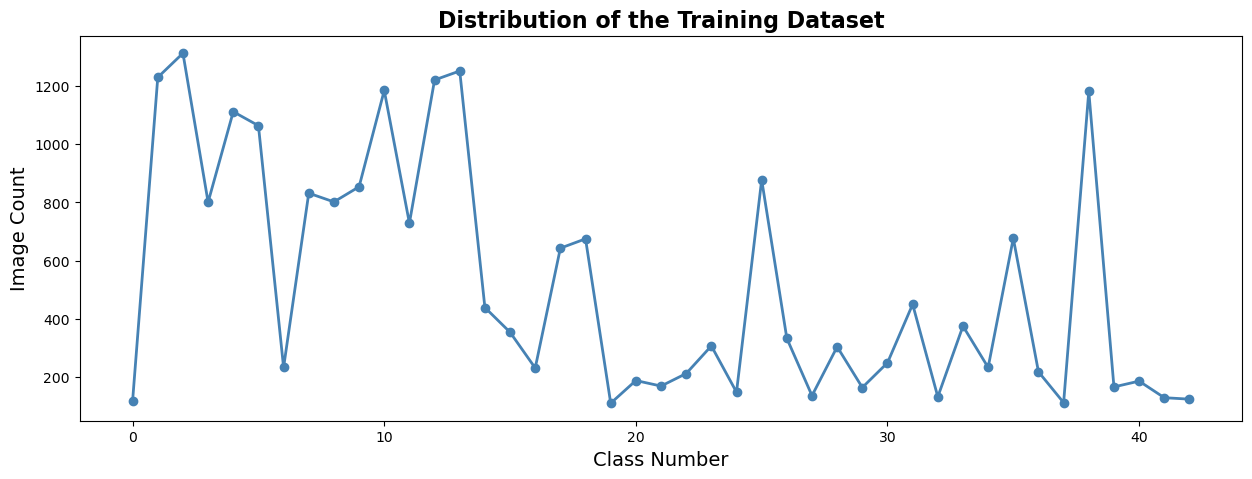

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(range(0, lengthOfClasses), numberOfSamples, marker='o', color="steelblue", linewidth=2)
plt.title("Distribution of the Training Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Class Number", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.show()


### Read the CSV file
- to read the csv files, the pandas library need to import

In [29]:
import pandas as pd

In [30]:
data = pd.read_csv(label_file)
print("data shape ", data.shape, type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


#### What is data
- it is a DataFrame object

In [31]:
print("All the information inside data")
print(data)

print("\nPrint only one row of that")
print(data.iloc[0])


All the information inside data
    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14            

### Display image for each class

In [32]:
import random

#### Numpy Array
- it is 3-dimensional NumPy array which store the pixels of the images
- For example [70, 65, 61] is a RGB color

In [33]:
print(X_train[0])

[[[47 40 37]
  [47 40 36]
  [52 43 40]
  ...
  [52 45 45]
  [53 46 44]
  [51 44 41]]

 [[52 42 38]
  [48 39 35]
  [45 38 35]
  ...
  [49 44 43]
  [51 46 43]
  [50 46 42]]

 [[47 41 39]
  [47 39 36]
  [42 36 34]
  ...
  [49 45 45]
  [52 49 46]
  [52 49 48]]

 ...

 [[35 33 33]
  [38 35 35]
  [57 48 48]
  ...
  [42 35 34]
  [41 33 30]
  [40 30 27]]

 [[34 31 30]
  [35 33 32]
  [52 47 46]
  ...
  [40 34 33]
  [40 33 30]
  [37 30 27]]

 [[34 29 27]
  [31 29 25]
  [42 39 37]
  ...
  [37 32 30]
  [37 30 28]
  [36 28 27]]]


#### Explanation about the below code

- imshow() that display an image
- x_selected[random_index, :, :] get the ramdom image, :, : that take all pixel values in dimensions
- axs[col].axis("off") to hide the unnecessary number

Total number for class number 0 : 119


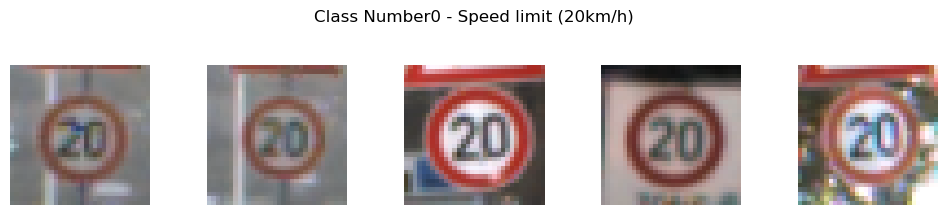

Total number for class number 1 : 1230


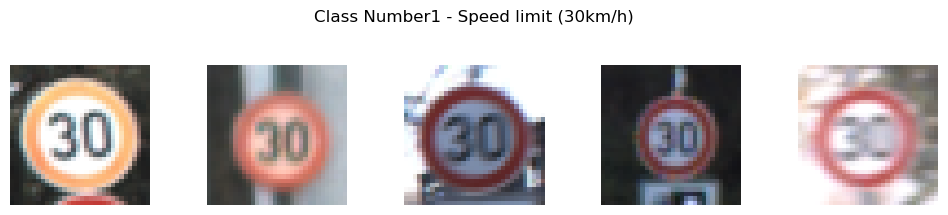

Total number for class number 2 : 1313


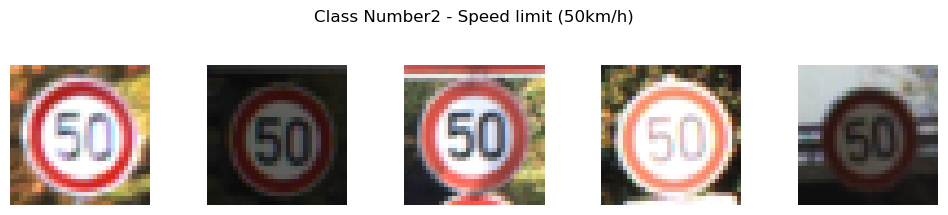

Total number for class number 3 : 801


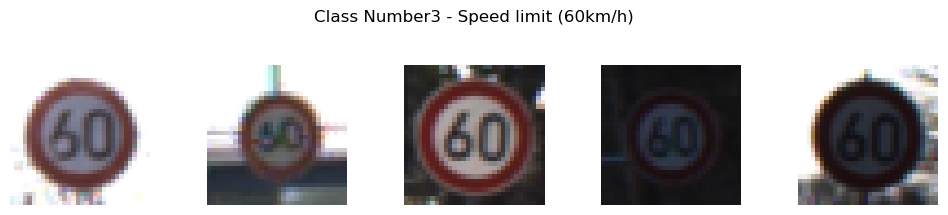

Total number for class number 4 : 1112


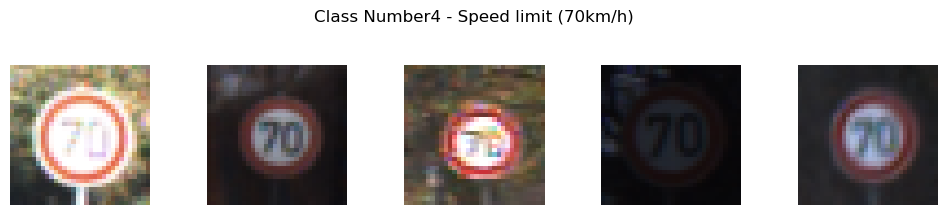

Total number for class number 5 : 1064


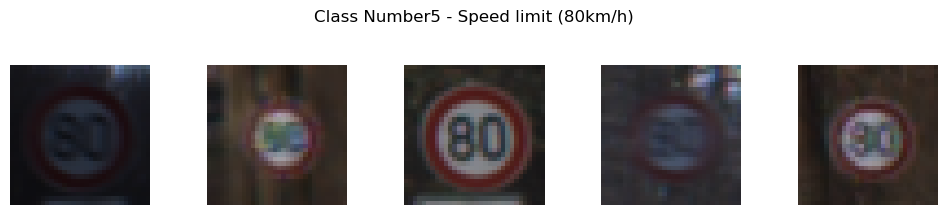

Total number for class number 6 : 233


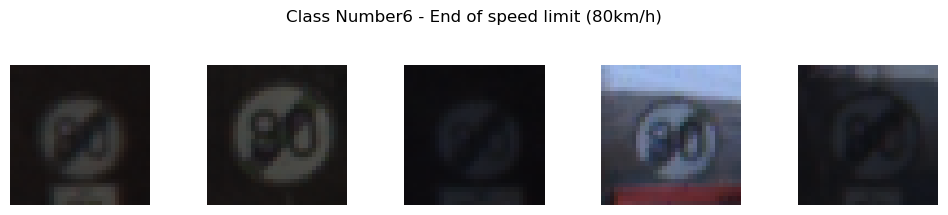

Total number for class number 7 : 832


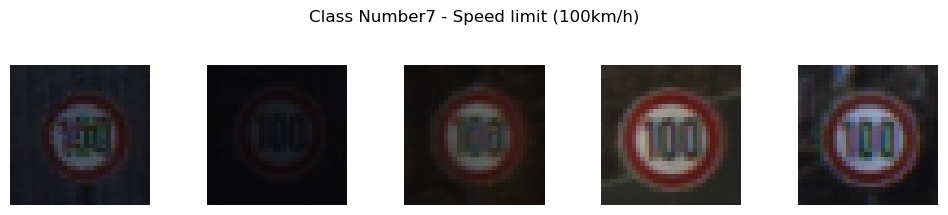

Total number for class number 8 : 802


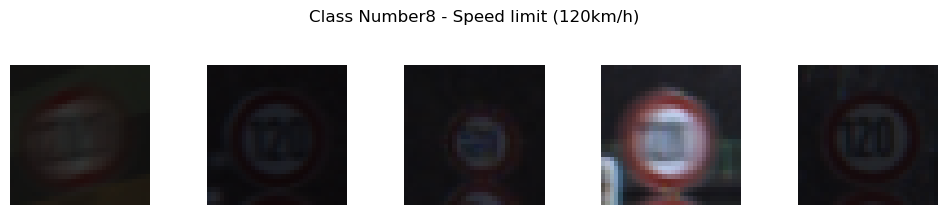

Total number for class number 9 : 854


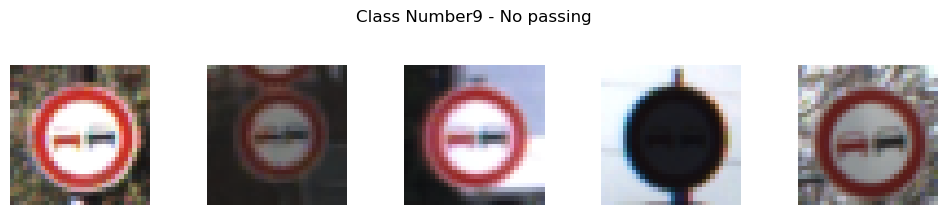

Total number for class number 10 : 1185


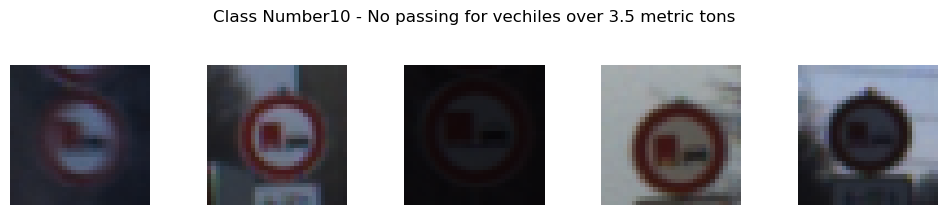

Total number for class number 11 : 729


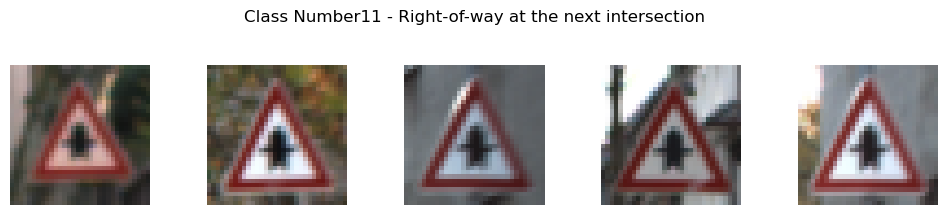

Total number for class number 12 : 1221


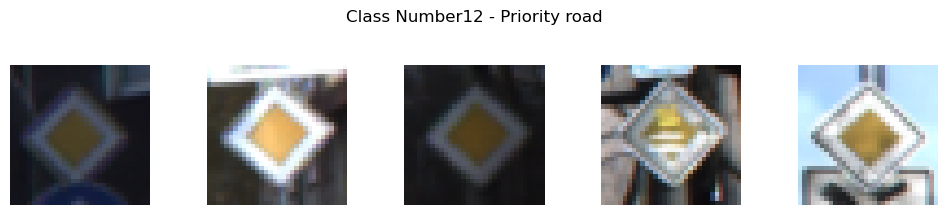

Total number for class number 13 : 1252


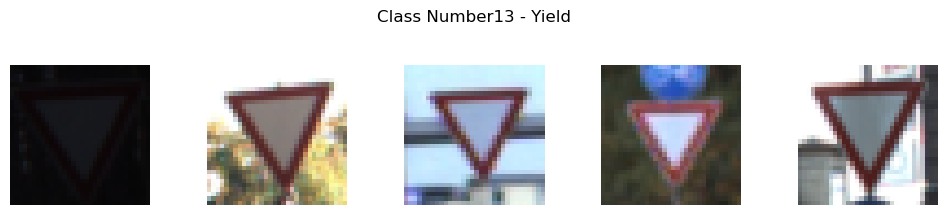

Total number for class number 14 : 439


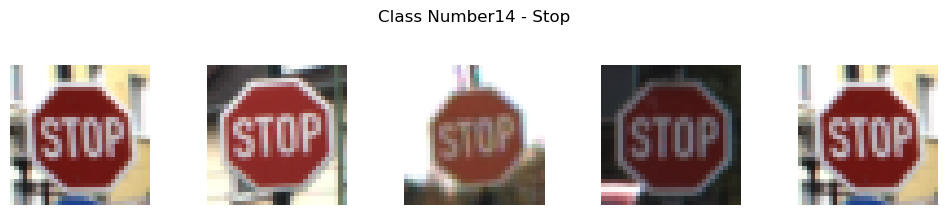

Total number for class number 15 : 354


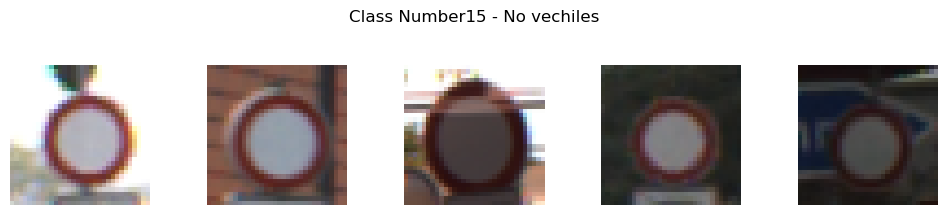

Total number for class number 16 : 231


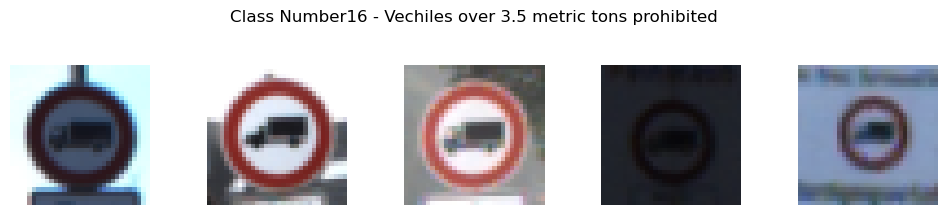

Total number for class number 17 : 643


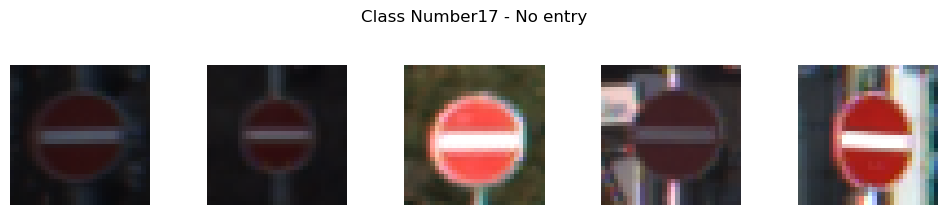

Total number for class number 18 : 675


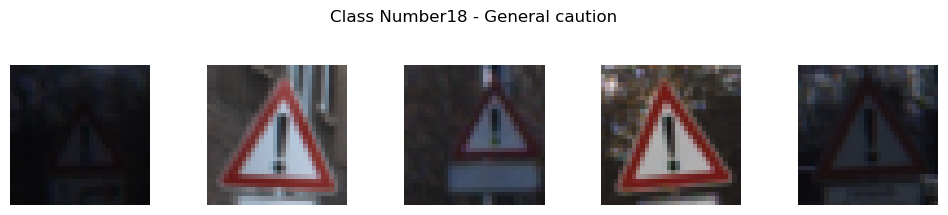

Total number for class number 19 : 110


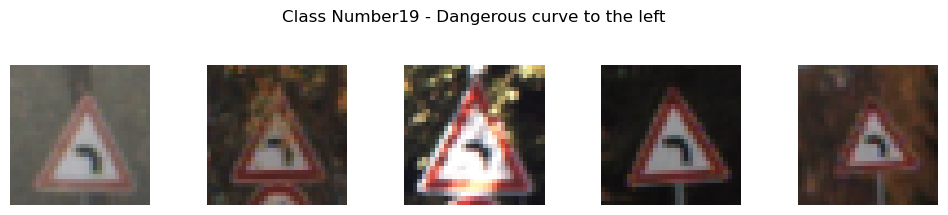

Total number for class number 20 : 188


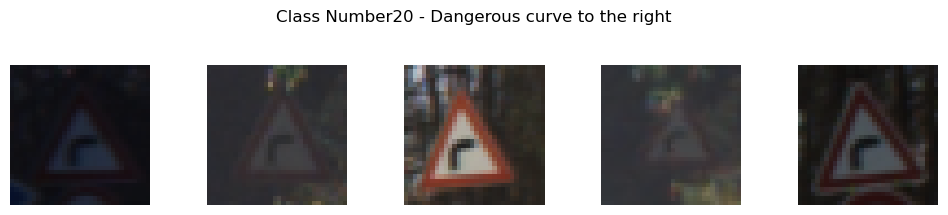

Total number for class number 21 : 169


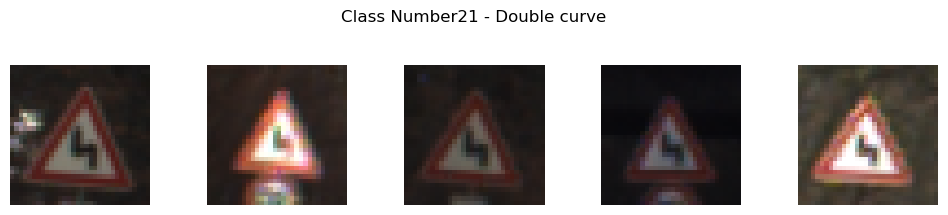

Total number for class number 22 : 212


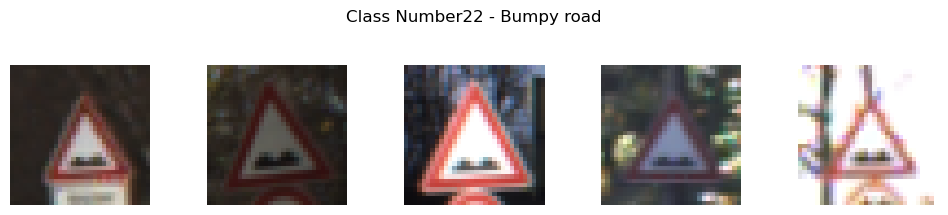

Total number for class number 23 : 307


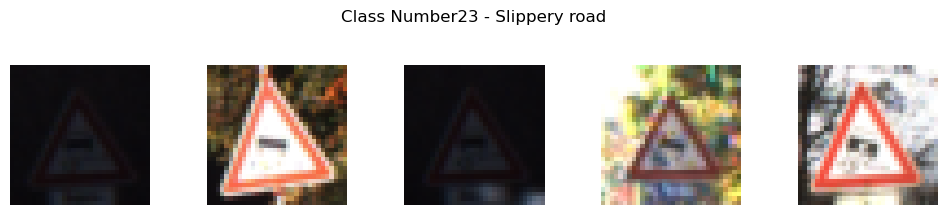

Total number for class number 24 : 148


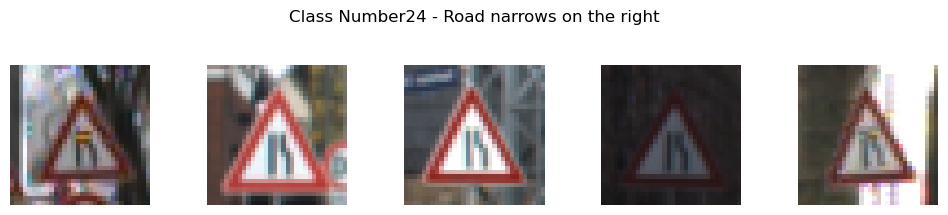

Total number for class number 25 : 878


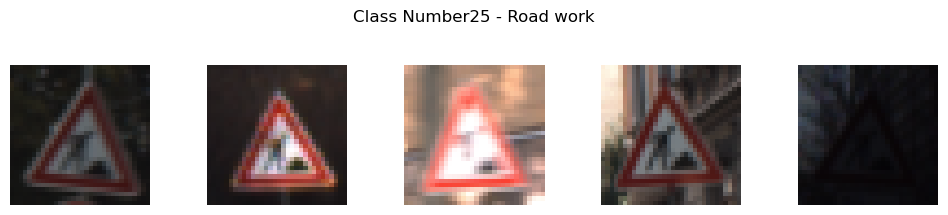

Total number for class number 26 : 333


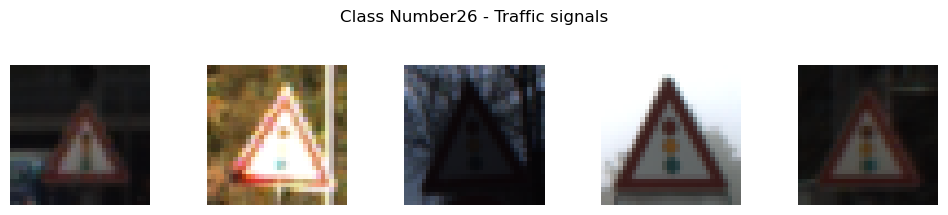

Total number for class number 27 : 136


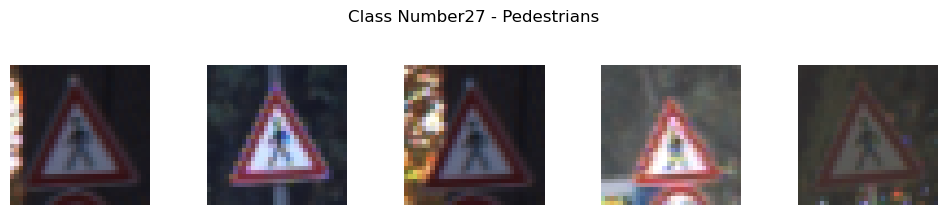

Total number for class number 28 : 304


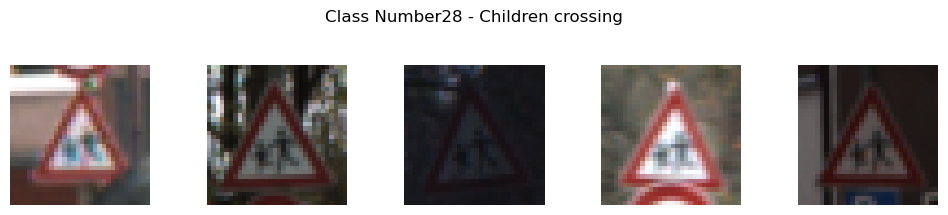

Total number for class number 29 : 164


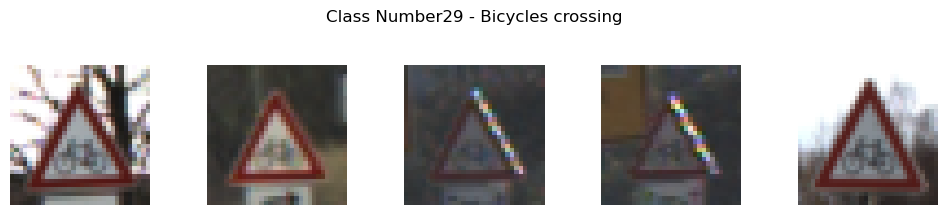

Total number for class number 30 : 249


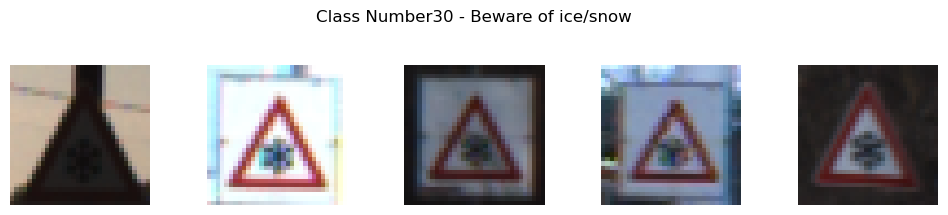

Total number for class number 31 : 450


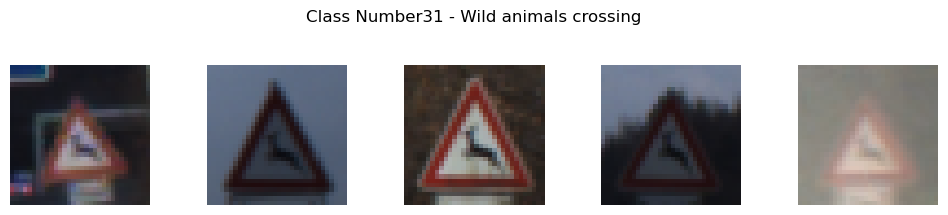

Total number for class number 32 : 132


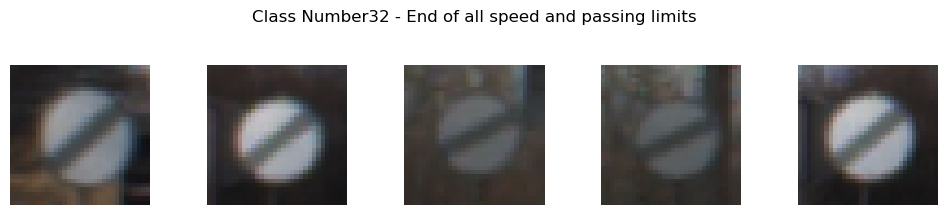

Total number for class number 33 : 375


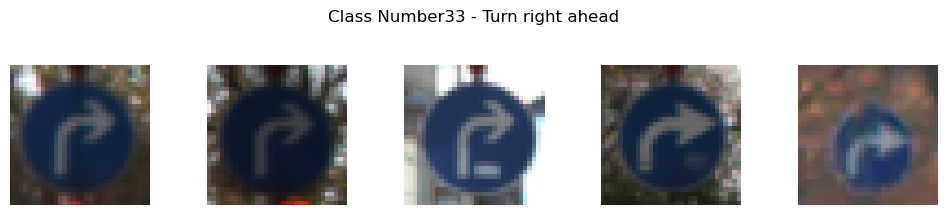

Total number for class number 34 : 233


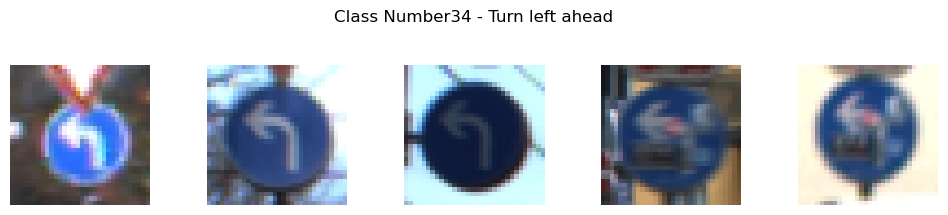

Total number for class number 35 : 677


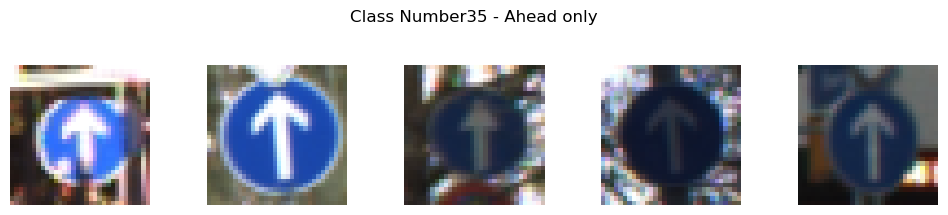

Total number for class number 36 : 218


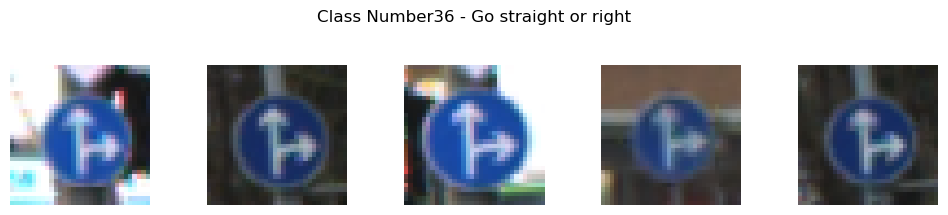

Total number for class number 37 : 112


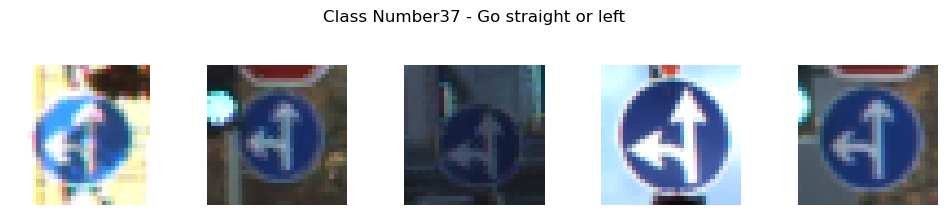

Total number for class number 38 : 1182


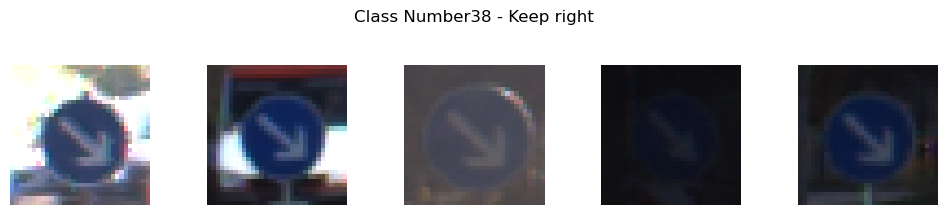

Total number for class number 39 : 166


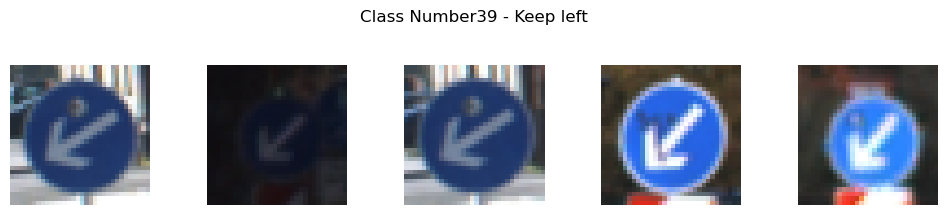

Total number for class number 40 : 186


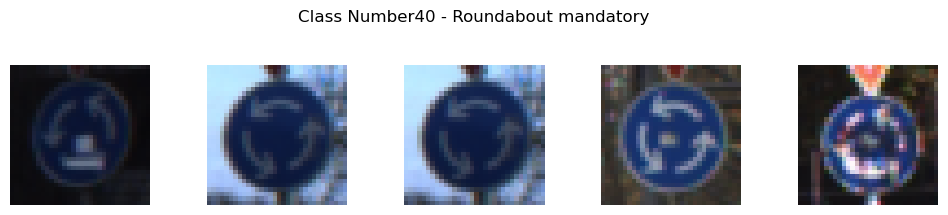

Total number for class number 41 : 129


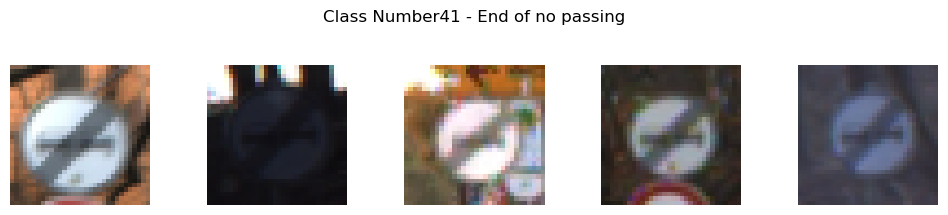

Total number for class number 42 : 124


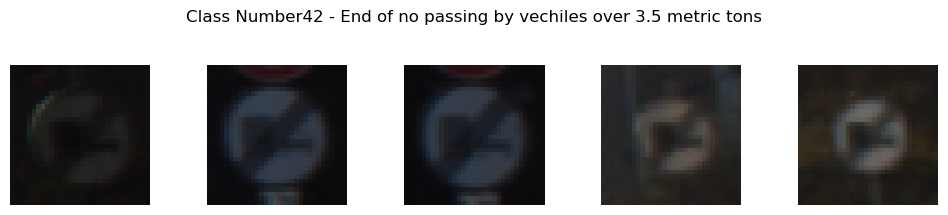

In [34]:
columns = 5

# Loop through each class and create a new figure for each
for classNo, row in data.iterrows():
    #print(row)
    fig, axs = plt.subplots(nrows=1, ncols=columns, figsize=(10, 2)) # ouput for 1 row with 5 columns
    fig.suptitle(f"Class Number{classNo} - {row['Name']}", fontsize=12, y=1.05) # ouput the tile for the plot Class [class id] - row['Name']

    # get the pixels values of image, in this case, filter the correct image that match with classNO
    x_selected = X_train[y_train == classNo]    
    lengthOfXselect = len(x_selected)
    print(f"Total number for class number {classNo} : {lengthOfXselect}")

    if lengthOfXselect == 0: 
        print(f"No images found for class number {classNo}. Skipping...")
        plt.close(fig)
        continue
    
    for col in range(columns):
        # get random inxdex from selected images which is numpy array
        random_index = random.randint(0, lengthOfXselect - 1)
        axs[col].imshow(x_selected[random_index, :, :], cmap="gray")
        # hide the axis number to view clearly
        axs[col].axis("off")
    
    # print out the image
    plt.tight_layout() # make the layout for photo
    plt.show() # print our photo

### Convert to gray image, equalize the light, hist, and normalize it (0 -255) to 0 - 1
#### the next thing is about preprocess all the images

- first make the function
- make image color to bgr to gray
- then equalize the image (mean make the lighting of image) so equalizeHist
- then we are going to normalize value, it means that gray scale value 0 - 255, we want to normalize 0 to 1
- normalize pixel values to [0, 1], want to restrict it from 0 to 1
- to have better training process
- output gray image

In [35]:
# function of convert gray image and euqlaise hist to image
def gray_and_lighting(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img

# function for preprocessing
def preprocessing(img):
    img = gray_and_lighting(img)
    img = img / 255
    return img

# images are in X_train and it will map and call the preprocessing function, this will give us a list
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_validation = np.array(list(map(preprocessing, X_validation)))

### Reshaping the images data with 1 becuase of gray images (3 channel to 1 channel)
- X_train.shape's [0] has number of images, [1] has height, and [2] has width

In [36]:
# Before Reshape
print("Before reshape", X_train.shape)

# Reshaping X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

# After Reshape
print("After reshape", X_train.shape)

Before reshape (22271, 32, 32)
After reshape (22271, 32, 32, 1)


##### If you want to view  image in X_train

In [37]:
# X_train = np.array(list(map(preprocessing, X_train)))
# img = X_train[30]
# img = cv2.resize(img,(300,300))
# cv2.imshow("Haha", img)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

### Data Augmentation To Make More Generic

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

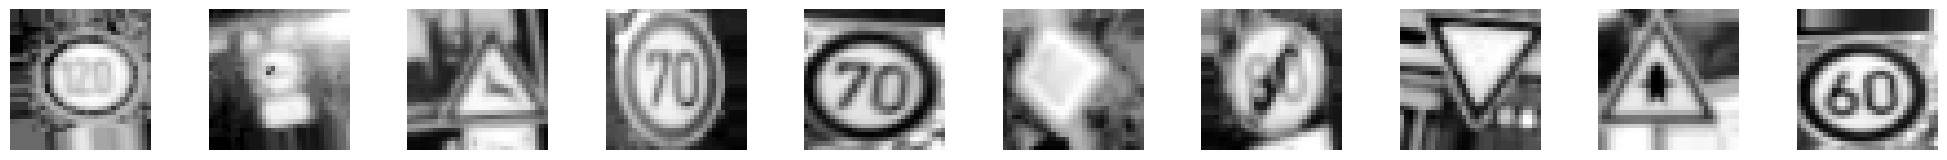

In [39]:
"""
Declare dataGenerator which is for Data Augmentation such as width & height shift, zoom in, shear, and rotate it
"""
dataGenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGenerator.fit(X_train)

# flow method will create batches fo augment images, in this case 1 batch contain batch size of 20
# it is good for deal with large data, so this will feed them to the model, one batch at time
batches = dataGenerator.flow(X_train, y_train, batch_size=20)

# get the 1 batch from batches, X_batch contrain 20, and y_batch contrain label for X_batch
X_batch, y_batch = next(batches)

# Show the Augment image for 10 images
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
fig.tight_layout()  # Adjust spacing to prevent overlap


for i in range(10):
    # Display each augmented image (reshaping to the original image dimensions)
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]), cmap='gray')
    axs[i].axis('off')
plt.show()






### One Hot Encoding
- import the library of to_categorical
- to convert label into One-hot-encoded format for classification
- use use one-hot encoded vectors, when predicting probabilities for different categories
- convert y_train (int value) to one-hot-encoded value, need the length of classes
- categorical cross-entropy loss function expects one-hot encoded labels

In [40]:
y_train = to_categorical(y_train, lengthOfClasses )
y_validation = to_categorical(y_validation, lengthOfClasses )
y_test = to_categorical(y_test, lengthOfClasses )

### CONVOLUTION NEURAL NETWORK MODEL (CNN Model)

In [41]:
# Add convolutional layers
def add_conv_layers(model, no_Of_Filters, size_of_Filter, size_of_pool, input_shape):
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=input_shape, activation='relu'))
    model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))

# Add second block of convolutional layers
def add_second_conv_block(model, no_Of_Filters, size_of_Filter2, size_of_pool):
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

# Add dense (fully connected) layers
def add_dense_layers(model, no_Of_Nodes, lengthOfClasses):
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(lengthOfClasses, activation='softmax'))  # Output layer

# Compile the model
def compile_model(model):
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# The main model function
def myModel(imageDimesions, lengthOfClasses):
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500

    model = Sequential()
    input_shape = (imageDimesions[0], imageDimesions[1], 1)  # Assuming grayscale image (1 channel)
    
    # Add the layers
    add_conv_layers(model, no_Of_Filters, size_of_Filter, size_of_pool, input_shape)
    add_second_conv_block(model, no_Of_Filters, size_of_Filter2, size_of_pool)
    add_dense_layers(model, no_Of_Nodes, lengthOfClasses)
    
    # Compile the model
    compile_model(model)
    
    return model

In [ ]:
batch_size_val = 50
steps_per_epoch_val = 2000
epochs_val = 25

In [43]:
model = myModel(imageDimesions, lengthOfClasses)
print(model.summary())
history = model.fit(dataGenerator.flow(X_train, y_train, batch_size=batch_size_val), 
                    epochs=epochs_val, 
                    validation_data=(X_validation, y_validation), 
                    steps_per_epoch=steps_per_epoch_val,
                    verbose=1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:21 53ms/step - accuracy: 0.1639 - loss: 3.1359

2024-11-09 16:14:41.813586: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.2684 - loss: 2.6853 - val_accuracy: 0.7372 - val_loss: 0.8770
Epoch 2/25
 445/2000 ━━━━━━━━━━━━━━━━━━━━ 1:21 52ms/step - accuracy: 0.5707 - loss: 1.4279

2024-11-09 16:15:07.060090: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6007 - loss: 1.3212 - val_accuracy: 0.9131 - val_loss: 0.3455
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7131 - loss: 0.9277 - val_accuracy: 0.9377 - val_loss: 0.2305
Epoch 4/25
 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:23 54ms/step - accuracy: 0.7651 - loss: 0.7438

2024-11-09 16:15:58.454458: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7748 - loss: 0.7162 - val_accuracy: 0.9549 - val_loss: 0.1726
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8114 - loss: 0.5966 - val_accuracy: 0.9720 - val_loss: 0.1031
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8329 - loss: 0.5318 - val_accuracy: 0.9747 - val_loss: 0.0906
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.8578 - loss: 0.4580 - val_accuracy: 0.9740 - val_loss: 0.0955
Epoch 8/25
 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:27 56ms/step - accuracy: 0.8619 - loss: 0.4323

2024-11-09 16:17:44.190583: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.8655 - loss: 0.4253 - val_accuracy: 0.9811 - val_loss: 0.0775
Epoch 9/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8766 - loss: 0.3946 - val_accuracy: 0.9806 - val_loss: 0.0654
Epoch 10/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8851 - loss: 0.3630 - val_accuracy: 0.9828 - val_loss: 0.0638
Epoch 11/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8944 - loss: 0.3368 - val_accuracy: 0.9898 - val_loss: 0.0468
Epoch 12/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9005 - loss: 0.3171 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 13/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9055 - loss: 0.3093 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 14/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9088 - loss: 0.2903 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 15/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9174 - loss

2024-11-09 16:21:06.928748: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9205 - loss: 0.2541 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 17/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9190 - loss: 0.2623 - val_accuracy: 0.9908 - val_loss: 0.0322
Epoch 18/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9218 - loss: 0.2461 - val_accuracy: 0.9916 - val_loss: 0.0296
Epoch 19/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9314 - loss: 0.2282 - val_accuracy: 0.9887 - val_loss: 0.0397
Epoch 20/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9327 - loss: 0.2193 - val_accuracy: 0.9926 - val_loss: 0.0272
Epoch 21/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9301 - loss: 0.2245 - val_accuracy: 0.9853 - val_loss: 0.0498
Epoch 22/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9368 - loss: 0.2071 - val_accuracy: 0.9898 - val_loss: 0.0282
Epoch 23/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9373 - los

In [44]:
# ############################### SAVING MODEL
model.save('Traffic_Sign_Model.h5')  # Saving model in h5 format

# ############################### EVALUATION
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023057367652654648
Test accuracy: 0.9933907985687256
